In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS

In [45]:
df = pd.read_csv("Data.csv")

In [44]:
data = {'ID': [1, 2, 3, 4, 5],
        'Time': [10, 20, 30, 20, 30]}
df = pd.DataFrame(data)

# Identify pairs of elements with the same number in the "Time" column and replace them with their sum
duplicate_time_values = df[df.duplicated(subset='Time', keep=False)]
for index, row in duplicate_time_values.iterrows():
    sum_value = row['Time'] * 2  # Replace the duplicate value with its sum
    df.loc[index, 'Time'] = sum_value

print(df)

   ID  Time
0   1    10
1   2    40
2   3    60
3   4    40
4   5    60


In [47]:
# Identify pairs of elements with the same number in the "Time" column and replace them with their sum
duplicate_time_values = df[df.duplicated(subset='Time', keep=False)]
for index, row in duplicate_time_values.iterrows():
    if df.loc[index + 1, 'Time'] == row["Time"]:
        df.loc[index + 1, 'Volume'] = df.loc[index + 1, 'Volume'] + df.loc[index + 1, 'Volume']
        df.loc[index + 1, 'AskBefore'] = df.loc[index, 'AskAfter']
        df.drop([index])
    # df.loc[index, 'Time'] = sum_value

# print(df)

4
5
13
14
62
63
64
65
66
67
68
69
70
71
83
84
100
101
103
104
105
106
111
112
130
131
138
139
140
141
142
143
144
145
146
147
148
149
150
182
183
219
220
222
223
227
228
231
232
260
261
262
263
264
265
276
277
281
282
302
303
317
318
320
321
322
346
347
358
359
360
370
371
372
386
387
389
390
391
392
393
394
409
410
429
430
431
432
433
442
443
444
454
455
468
469
491
492
494
495
496
497
501
502
506
507
518
519
520
539
540
564
565
566
567
568
569
570
579
580
581
582
583
601
602
609
610
622
623
632
633
639
640
656
657
658
659
669
670
671
672
673
674
676
677
684
685
686
687
717
718
719
720
721
728
729
730
742
743
744
748
749
750
751
754
755
780
781
782
806
807
808
814
815
816
817
834
835
836
845
846
847
848
849
850
851
852
853
854
855
856
857
901
902
911
912
920
921
922
937
938
943
944
945
947
948
949
950
951
952
953
954
955
956
957
963
964
965
966
967
972
973
974
976
977
978
983
984
1009
1010
1011
1015
1016
1027
1028
1032
1033
1034
1035
1036
1046
1047
1070
1071
1118
1119
1123
1124
1125
1

In [27]:
row1 = next(df.iterrows())
print(row1)
# row2 = next(next(df.iterrows()))
# for i in range(len(df) - 2):
#     if row1["Time"] == row2["Time"]:
#         print(1)

TypeError: DataFrame.iterrows() takes 1 positional argument but 2 were given

In [28]:
for i in range(1, len(df)):
    if df[1]

KeyError: 'c1'

In [5]:
deltaA = df["AskAfter"] - df["AskBefore"]
deltat = np.diff(df["Time"])
x = df["Volume"]

In [ ]:
Y = deltaA

In [6]:
model = OLS(Y, X)

res = model.fit()

print(res.summary())

array([9.99844153e-01, 9.42000042e-06, 2.02740048e-05, ...,
       0.00000000e+00, 7.99936555e+00, 0.00000000e+00])

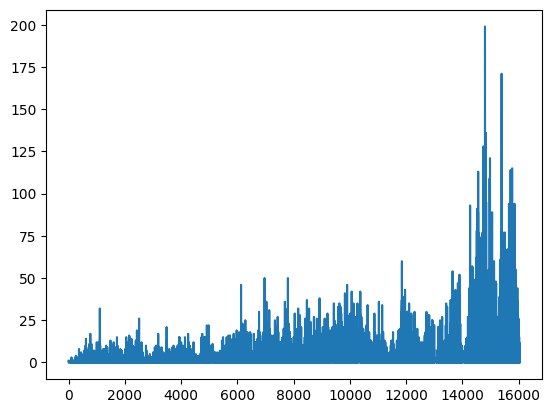

In [9]:
plt.plot(deltat)

In [ ]:
arima_model_025 = ARIMA(["Y025"], exog=pd.concat([df_fc, dataset_train["Y025_regimes"]] , axis=1), order=(1,1,1)).fit()